<a href="https://colab.research.google.com/github/stephenchen0814/04-LinearReg_Salary/blob/main/04-LinearReg_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import linalg as la
sp.init_printing()
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns


In [ ]:
df=pd.read_csv('04-LinearReg_Salary.csv')
df.shape

(30, 3)

In [ ]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
YearsExperience,float64
Salary,float64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [ ]:
df['YearsExperience'].value_counts()

,count
YearsExperience,
4.1,2
3.3,2
1.2,1
1.4,1
2.1,1
1.6,1
3.0,1
2.3,1
3.1,1


In [ ]:
df['Salary'].value_counts()

,count
Salary,
39344.0,1
46206.0,1
37732.0,1
43526.0,1
39892.0,1
56643.0,1
60151.0,1
54446.0,1
64446.0,1


In [ ]:
df.dropna(inplace=True)
df.shape

(30, 3)

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.to_csv('04-LinearReg_Salary.csv', index = None, header=True)

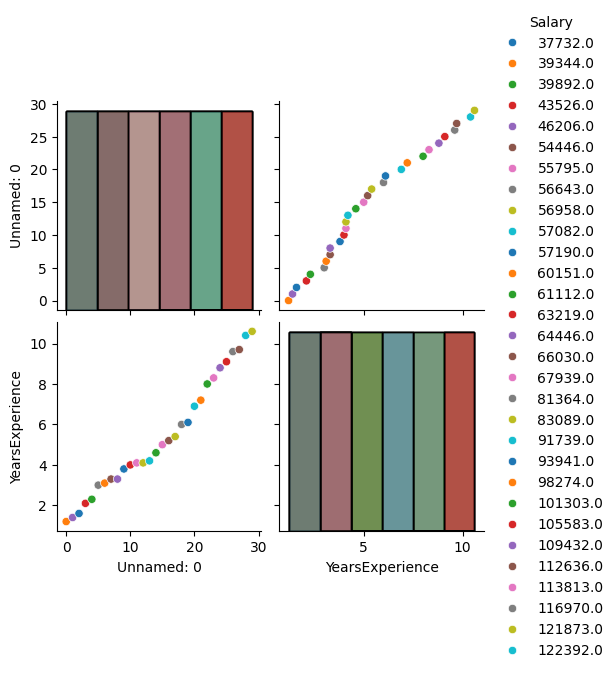

In [ ]:
sns.pairplot(data=df, hue='Salary', diag_kind='hist', palette='tab10')

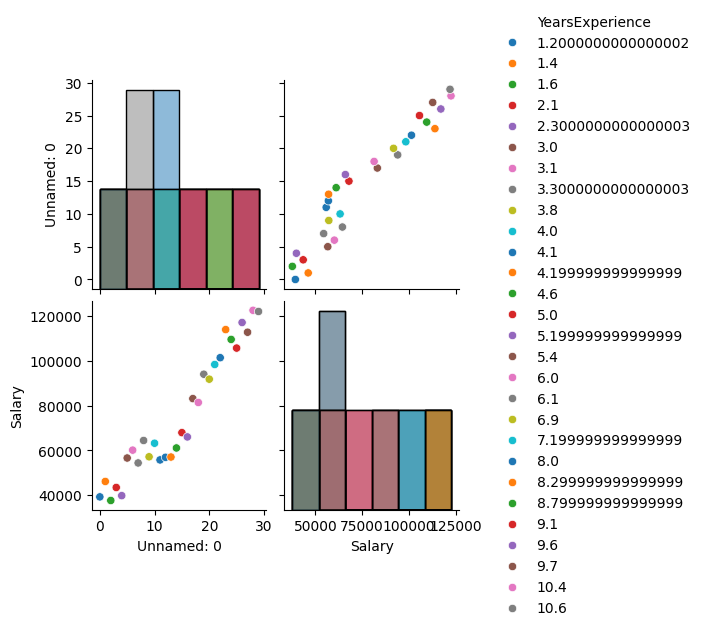

In [ ]:
sns.pairplot(data=df, hue='YearsExperience', diag_kind='hist', palette='tab10')

<Axes: >

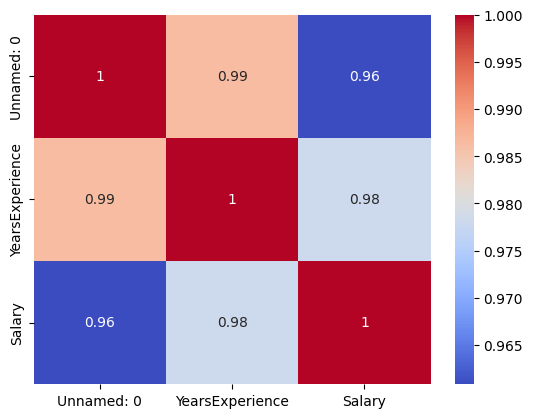

In [ ]:
numdf=df.select_dtypes(include=['float64','int64'])
sns.heatmap(numdf.corr(method="pearson"), cmap="coolwarm", annot=True)

In [ ]:
df2.head()

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [ ]:
M=np.array(df2)
M

array([[ 39344.],
       [ 46206.],
       [ 37732.],
       [ 43526.],
       [ 39892.],
       [ 56643.],
       [ 60151.],
       [ 54446.],
       [ 64446.],
       [ 57190.],
       [ 63219.],
       [ 55795.],
       [ 56958.],
       [ 57082.],
       [ 61112.],
       [ 67939.],
       [ 66030.],
       [ 83089.],
       [ 81364.],
       [ 93941.],
       [ 91739.],
       [ 98274.],
       [101303.],
       [113813.],
       [109432.],
       [105583.],
       [116970.],
       [112636.],
       [122392.],
       [121873.]])

In [ ]:
SM=sp.Matrix(df2)

In [ ]:
pd.DataFrame(M)

,0
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


In [ ]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0
